In [ ]:
"""You have to run flowers_init once before this code can be executed"""

In [1]:
import time
import numpy as np
import pandas as pd
from keras import layers
from keras import models
from keras.preprocessing.image import ImageDataGenerator
#import matplotlib
import matplotlib.pyplot as plt
import pickle
#from sklearn.metrics import confusion_matrix
from keras.applications import InceptionV3
import os
from keras import optimizers
#import itertools
#from keras.optimizers import SGD, Adam, RMSprop, Nadam

import tensorflow as tf
import keras
from keras.callbacks import Callback
startTime = time.time()
threads = 12
config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': threads}) 
config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 1.00
sess = tf.Session(config=config) 
keras.backend.set_session(sess)
print("---------------------------------------------------------------")
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

Using TensorFlow backend.


---------------------------------------------------------------
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 883266581815518215
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11811160064
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10594398785915091292
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:0a:00.0, compute capability: 6.1"
]


In [2]:
np.random.seed(1)

In [3]:
train_images = pickle.load(open("train_images.pkl", "rb"))
val_images = pickle.load(open("val_images.pkl", "rb"))
test_images = pickle.load(open("test_images.pkl", "rb"))

In [4]:
base_dir = 'flowers_split'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))      
#softmax for the five clases
#sigmoid for binary classes

In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           horizontal_flip=True,
                                           fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [8]:
train_generator = train_datagen.flow_from_directory(train_dir, # This is the target directory 
                                                        target_size=(150, 150), # All images will be resized to 150x150 
                                                        batch_size=batch_size, 
                                                        class_mode='categorical') 

Found 2593 images belonging to 5 classes.


In [9]:
validation_generator = val_datagen.flow_from_directory(validation_dir, 
                                                           target_size=(150, 150), 
                                                           batch_size=batch_size, 
                                                           class_mode='categorical')

Found 865 images belonging to 5 classes.


In [10]:
history = model.fit_generator(train_generator,
                                  steps_per_epoch=len(train_images)//batch_size,
                                  epochs=30,
                                  validation_data=validation_generator,
                                  validation_steps=len(val_images)//batch_size,
                                  use_multiprocessing=False,
                                  workers=int(threads/2)-1
                                  )#verbose=0)

#use_multprocessing enables the cpu to do the data generator preprocessing on multiple cores before 
#the data is sent to the gpu. If this is not enabled it is possible that the cpu becomes the bottleneck and
#not the gpu.

Epoch 1/30
129/129 [==============================] - 6s 44ms/step - loss: 1.4469 - acc: 0.3845 - val_loss: 1.0883 - val_acc: 0.5372
Epoch 2/30
129/129 [==============================] - 4s 30ms/step - loss: 1.1622 - acc: 0.5243 - val_loss: 1.0932 - val_acc: 0.5929
Epoch 3/30
129/129 [==============================] - 4s 29ms/step - loss: 1.0460 - acc: 0.5823 - val_loss: 0.9270 - val_acc: 0.6059
Epoch 4/30
129/129 [==============================] - 4s 30ms/step - loss: 0.9733 - acc: 0.6183 - val_loss: 1.0096 - val_acc: 0.6284
Epoch 5/30
129/129 [==============================] - 4s 29ms/step - loss: 0.9377 - acc: 0.6431 - val_loss: 0.8609 - val_acc: 0.6686
Epoch 6/30
129/129 [==============================] - 4s 29ms/step - loss: 0.8932 - acc: 0.6575 - val_loss: 0.8388 - val_acc: 0.6876
Epoch 7/30
129/129 [==============================] - 4s 29ms/step - loss: 0.8757 - acc: 0.6635 - val_loss: 0.7749 - val_acc: 0.7254
Epoch 8/30
129/129 [==============================] - 4s 29ms/step - 

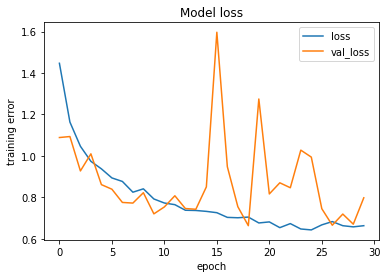

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('training error')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc=0)
plt.show()

In [12]:
"""Save train loss"""
#plt.savefig('image_gen_train_loss_image_augmentation.png', bbox_inches='tight')

'Save train loss'

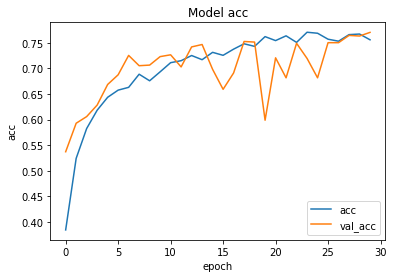

In [13]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc'], loc=0)
plt.show()

In [14]:
"""Save train accuracy"""
#plt.savefig('image_gen_train_loss_image_augmentation.png', bbox_inches='tight')

'Save train accuracy'

In [15]:
"""TEST SET"""

'TEST SET'

In [16]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 865 images belonging to 5 classes.
test acc: 0.7583756350018651


In [17]:
test_generator = test_datagen.flow_from_directory(validation_dir, 
                                                        target_size=(150, 150), 
                                                        batch_size=batch_size,
                                                        shuffle=False,
                                                        class_mode='categorical')

Found 865 images belonging to 5 classes.


In [18]:
pred_result = model.predict_generator(test_generator,
                                 steps=len(test_images)//batch_size,
                                 verbose=0)

In [19]:
def create_list(arr_arr):
    new_arr = []
    for x in arr_arr:
        index = 0
        for i in x:
            if i > 0:
                new_arr.append(index)
                break
            index += 1
    return new_arr

In [20]:
labels=['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
labels_d={'daisy':0, 'dandelion':1, 'rose':2, 'sunflower':3, 'tulip':4}

# I make a new test generator to make sure that it starts from the begining
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        shuffle=False,
        class_mode='categorical')
correct_result = []
count = 0
leng = len(pred_result)/batch_size
print(leng)
for x, y in test_generator:
    correct_result.extend(create_list(y))
    count+=1
    if count > leng: #leng
        break

Found 865 images belonging to 5 classes.
43.0


In [21]:
df = pd.DataFrame(np.zeros((5, 5)), columns=labels) #,index=labels

In [22]:
for i in range(0, len(pred_result[:,0])): 
        maxV = 0
        j = 0
        
        for j in range(0, len(pred_result[0,:])):
            if pred_result[i,j] > maxV:
                maxV = pred_result[i,j]
                maxIndex = j
        df.iloc[maxIndex,correct_result[i]] +=1

In [23]:
print("confusion matrix: rows are predictions, columns are the correct answers")
print(df)

confusion matrix: rows are predictions, columns are the correct answers
   daisy  dandelion  rose  sunflower  tulip
0   85.0       27.0   0.0        2.0    1.0
1   12.0      157.0  21.0        6.0    5.0
2   13.0        9.0  86.0       22.0   22.0
3    5.0        9.0   1.0      106.0    8.0
4   12.0       19.0  47.0       22.0  163.0


In [24]:
endTime = time.time()
print(endTime - startTime)

196.10093140602112
